Predicting fraudulent transactions

## 1 - importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as missno
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts

## 2 - reading the data

In [17]:
data=pd.read_csv('Fraud.csv')

## 3 - data View

In [19]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#3 - Looking into the data

In [22]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [24]:
data.head
print(data)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [26]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [28]:
data.tail


<bound method NDFrame.tail of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [30]:
data.shape

(6362620, 11)

In [32]:
data.size

69988820

In [34]:
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


#3 - finding any missing/null values

In [37]:
print(data['newbalanceOrig'])

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362615         0.00
6362616         0.00
6362617         0.00
6362618         0.00
6362619         0.00
Name: newbalanceOrig, Length: 6362620, dtype: float64


## 4 - visulizing any null data using missingno

In [232]:
#initially I found no null values
#but they were in the value of 0's which hampered my model prediction

<Axes: >

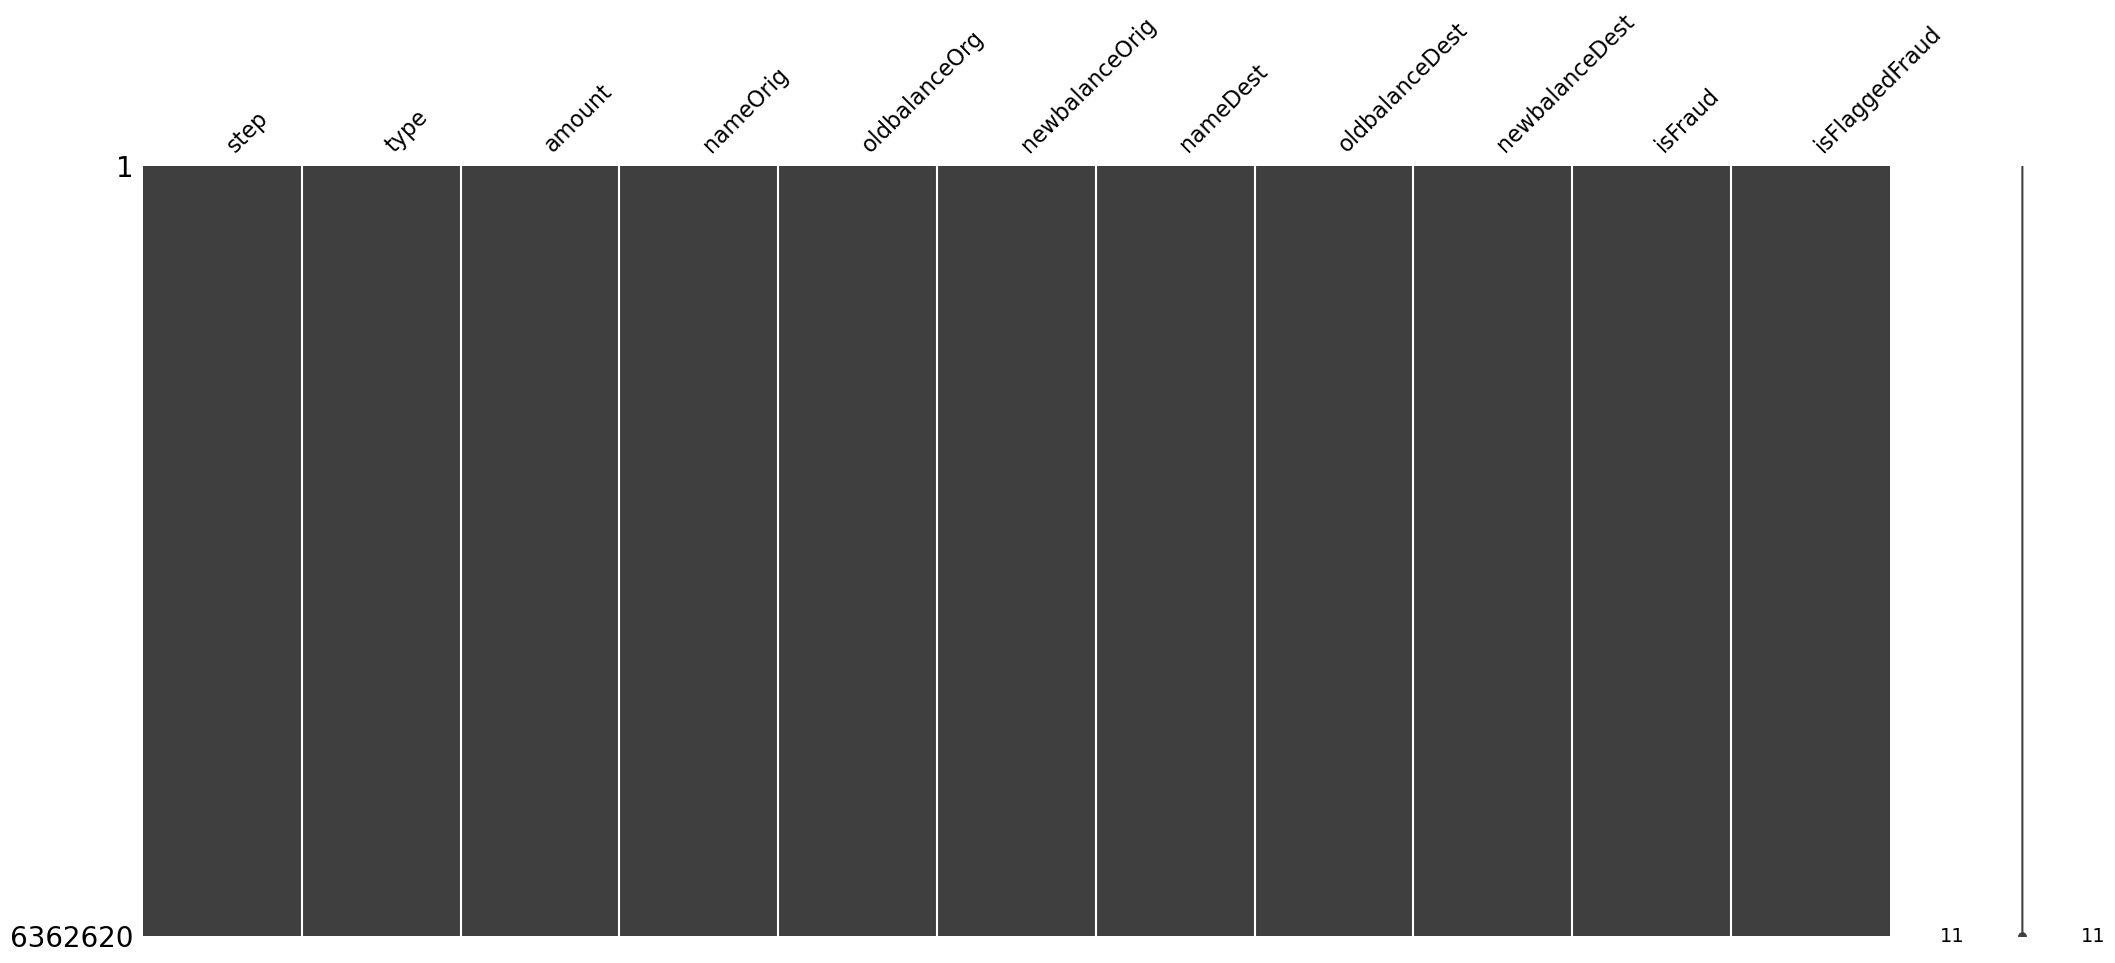

In [40]:
missno.matrix(data)

<Axes: >

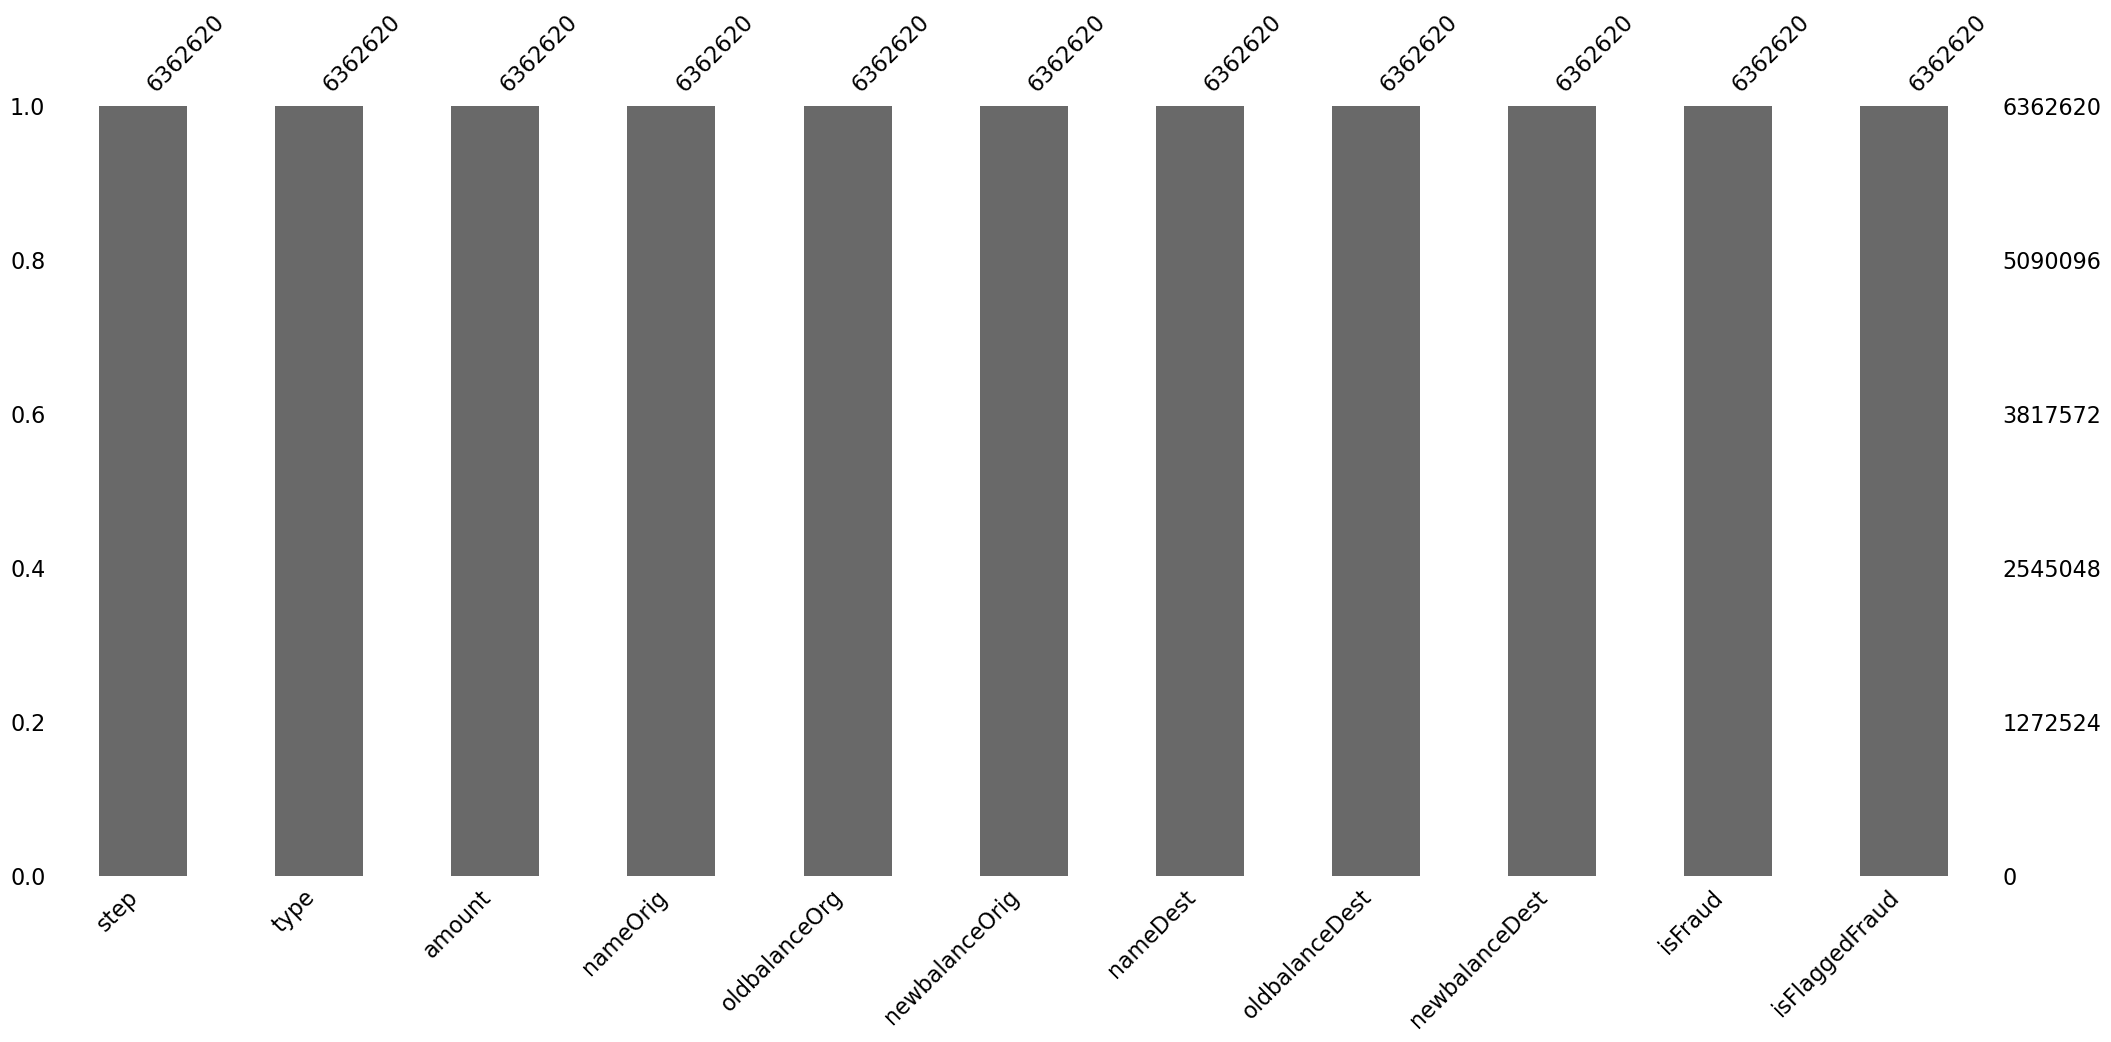

In [42]:
missno.bar(data)

In [44]:
pd.isnull(data)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [46]:
pd.isnull(data).sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

by this we understand that there are no null value, if may it may be in the form of 0

## 5 - dealing with null values(0-values)

1. Data cleaning including missing values, outliers and multi-collinearity - is one of the most important step for training the model.
It not only fluctuates the prediction but also results in a irregularity which proven untrustworthy  

<function matplotlib.pyplot.show(close=None, block=None)>

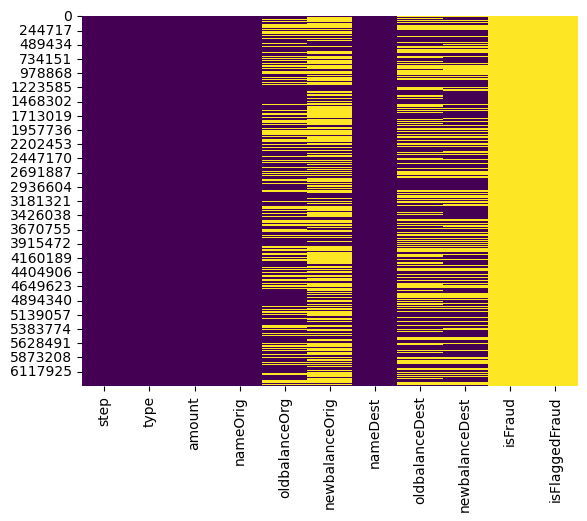

In [50]:
#considering 0 as null values
#viualizing all the zeroe's

sns.heatmap(data==0,cbar=False,cmap='viridis')
plt.show

## 6 - We employ statistical method to replace the 0's with the approximate value - Using mean
## Finding the mean value of the column and replacing it with the 0 vale

3. How did you select variables to be included in the model? - As they no "Right way is the Wrong way" ,daying that there are multiple ways of choosing the variable.
As I choose the statistical method(Mean) as the variable owing to it's ,complexity and range of value

#finding the mean of the oldbalanceOrg column and replacing it with 0

In [195]:
#dealing with the first column - 'oldbalanceOrg'
for col in data.columns:
    mean=data['oldbalanceOrg'].mean()
    data['oldbalanceOrg']=data['oldbalanceOrg'].replace(0,mean)

data['oldbalanceOrg'][:200]

0      170136.0
1       21249.0
2         181.0
3         181.0
4       41554.0
         ...   
195    833883.1
196    833883.1
197    833883.1
198    833883.1
199    833883.1
Name: oldbalanceOrg, Length: 200, dtype: float64

## dealing with 2nd Column contaoining 0 - newbalanceOrig

In [200]:
for cols in data.columns:
    median=data['newbalanceOrig'].median()
    data['newbalanceOrig']=data['newbalanceOrig'].replace(0,median)

data['newbalanceOrig']

0           160296.4
1            19384.7
2          1976264.7
3          1976264.7
4            29885.9
             ...    
6362615    1976264.7
6362616    1976264.7
6362617    1976264.7
6362618    1976264.7
6362619    1976264.7
Name: newbalanceOrig, Length: 6362620, dtype: float64

In [202]:
#replacing the mena value
mean_newbalanceOrig = data[data['newbalanceOrig'] != 0]['newbalanceOrig'].mean()
mean_newbalanceOrig

1976265.6149205035

In [66]:
data['newbalanceOrig']=data['newbalanceOrig'].replace(0,mean_newbalanceOrig)
data['newbalanceOrig']

0          1.602964e+05
1          1.938472e+04
2          1.976265e+06
3          1.976265e+06
4          2.988586e+04
               ...     
6362615    1.976265e+06
6362616    1.976265e+06
6362617    1.976265e+06
6362618    1.976265e+06
6362619    1.976265e+06
Name: newbalanceOrig, Length: 6362620, dtype: float64

## Now we can observe that the 0 have been changed with their respective mean

In [68]:
a=data['newbalanceOrig'],
b=data['oldbalanceOrg']
print(a,b)

(0          1.602964e+05
1          1.938472e+04
2          1.976265e+06
3          1.976265e+06
4          2.988586e+04
               ...     
6362615    1.976265e+06
6362616    1.976265e+06
6362617    1.976265e+06
6362618    1.976265e+06
6362619    1.976265e+06
Name: newbalanceOrig, Length: 6362620, dtype: float64,) 0           170136.00
1            21249.00
2              181.00
3              181.00
4            41554.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceOrg, Length: 6362620, dtype: float64


In [205]:
#rounding of the data for easier view and interpretation
data['oldbalanceOrg']=round(data['oldbalanceOrg'],1)
data['newbalanceOrig']=round(data['newbalanceOrig'],1)


In [207]:
#after rounding off the value
data['oldbalanceOrg']
data['newbalanceOrig']

0           160296.4
1            19384.7
2          1976264.7
3          1976264.7
4            29885.9
             ...    
6362615    1976264.7
6362616    1976264.7
6362617    1976264.7
6362618    1976264.7
6362619    1976264.7
Name: newbalanceOrig, Length: 6362620, dtype: float64

In [74]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Replacing the mean with 0 in the 3rd column

In [78]:
mean_oldbalanceDest=data[data['oldbalanceDest']!=0]['oldbalanceDest'].mean()
mean_oldbalanceDest

1914407.4070292043

In [79]:
data['oldbalanceDest']=data['oldbalanceDest'].replace(0,mean_oldbalanceDest)
data['oldbalanceDest']

0          1.914407e+06
1          1.914407e+06
2          1.914407e+06
3          2.118200e+04
4          1.914407e+06
               ...     
6362615    1.914407e+06
6362616    1.914407e+06
6362617    6.848884e+04
6362618    1.914407e+06
6362619    6.510099e+06
Name: oldbalanceDest, Length: 6362620, dtype: float64

In [82]:
data['oldbalanceDest']=round(data['oldbalanceDest'],1)
data['oldbalanceDest']

0          1914407.4
1          1914407.4
2          1914407.4
3            21182.0
4          1914407.4
             ...    
6362615    1914407.4
6362616    1914407.4
6362617      68488.8
6362618    1914407.4
6362619    6510099.1
Name: oldbalanceDest, Length: 6362620, dtype: float64

In [84]:
data['newbalanceDest'][:200]

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
195      22190.99
196    1363368.51
197    6453430.91
198    3461666.05
199    2107965.39
Name: newbalanceDest, Length: 200, dtype: float64

In [210]:
#replacing the mean value in the column- newbalanceDest
mean_newbalanceDest=data[data['newbalanceDest']!=0]['newbalanceDest'].mean()
mean_newbalanceDest

1986698.4384088437

In [88]:
data['newbalanceDest']=round(data['newbalanceDest'].replace(0,mean_newbalanceDest))
data['newbalanceDest']

0          1986698.0
1          1986698.0
2          1986698.0
3          1986698.0
4          1986698.0
             ...    
6362615     339682.0
6362616    1986698.0
6362617    6379898.0
6362618    1986698.0
6362619    7360102.0
Name: newbalanceDest, Length: 6362620, dtype: float64

Made sure that there are no 0's(vlaues) in any columns

In [ ]:
new_data=data[['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']]
new_data

## Visualizing the 0's 

<function matplotlib.pyplot.show(close=None, block=None)>

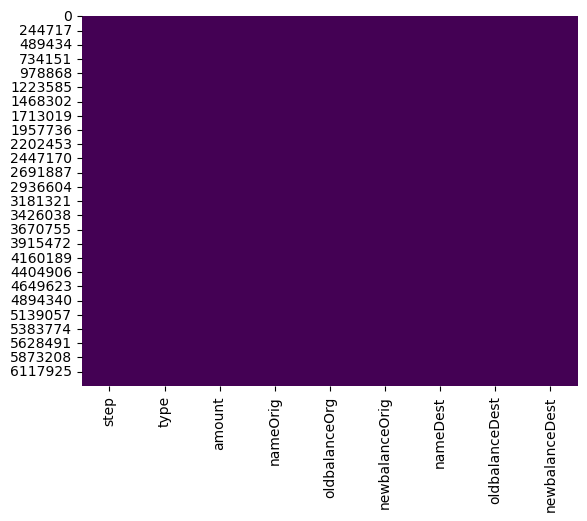

In [93]:
sns.heatmap(new_data==0,cbar=False,cmap='viridis')
plt.show

We can notice that there are no null/zero(0) values among the data 

## 7 - Exploratory Data Analysis(EDA)

## Defining/showing the co-relation among the data

In [98]:
print(data.corr(numeric_only=True))

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.011513       -0.009014   
amount          0.022373  1.000000       0.002626        0.032727   
oldbalanceOrg  -0.011513  0.002626       1.000000        0.962354   
newbalanceOrig -0.009014  0.032727       0.962354        1.000000   
oldbalanceDest  0.032633  0.259083       0.010846        0.011975   
newbalanceDest  0.027456  0.425158      -0.000545       -0.000774   
isFraud         0.031578  0.076688       0.006904        0.002008   
isFlaggedFraud  0.003277  0.012295       0.003753        0.003362   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step              3.263260e-02    2.745628e-02  0.031578    3.277415e-03  
amount            2.590830e-01    4.251582e-01  0.076688    1.229460e-02  
oldbalanceOrg     1.084597e-02   -5.453297e-04  0.006904    3.752645e-03  
newbalanceOrig    1.197468e-02   -7.737004e-04  0.002008    3.362136e-03  
old

<function matplotlib.pyplot.show(close=None, block=None)>

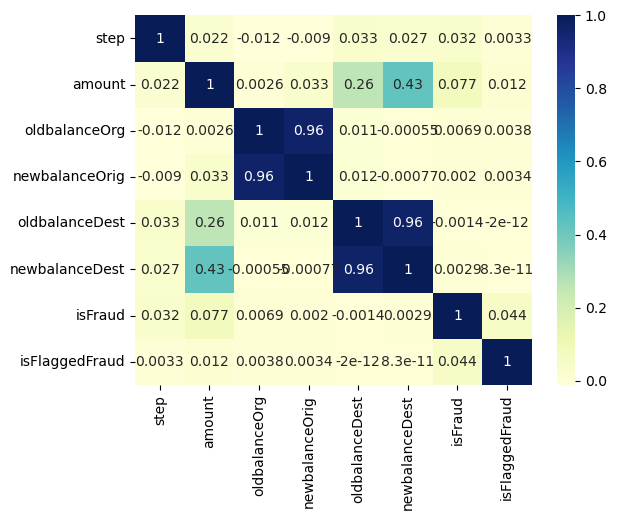

In [100]:
sns.heatmap(data.corr(numeric_only=True),cmap="YlGnBu",annot=True)
plt.show

## Finding the co-relation among the given columns
# example - 'oldbalanceOrg' and 'newbalanceOrig'

In [239]:
#this gives an insight among the data relation among each other
data1=data[['oldbalanceOrg','newbalanceOrig']]
corelation1=data1.corr()
corelation1

,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.962354
newbalanceOrig,0.962354,1.000000


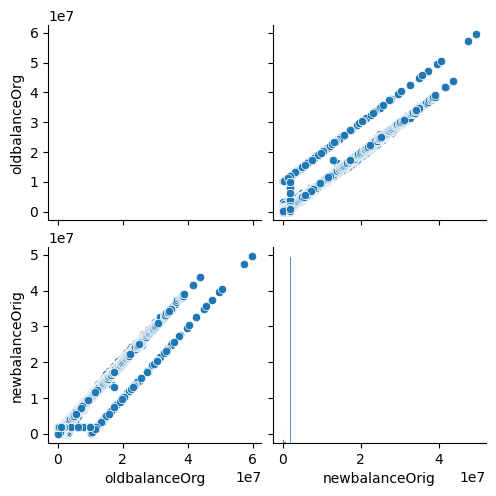

In [104]:
sns.pairplot(data1)
plt.show()

In [243]:
data2=data[['oldbalanceDest', 'newbalanceDest']]
corelation2=data2.corr()
corelation2

,oldbalanceDest,newbalanceDest
oldbalanceDest,1.000000,0.964981
newbalanceDest,0.964981,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

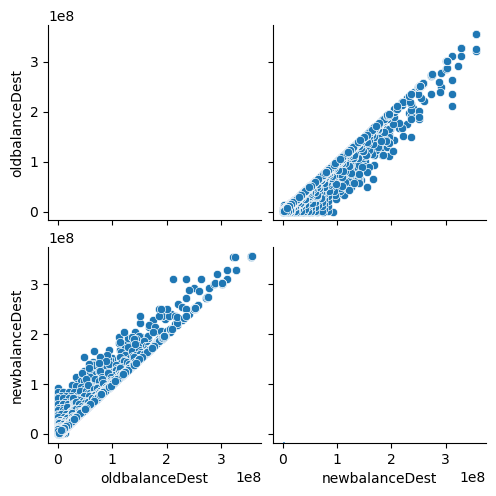

In [245]:
sns.pairplot(data2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

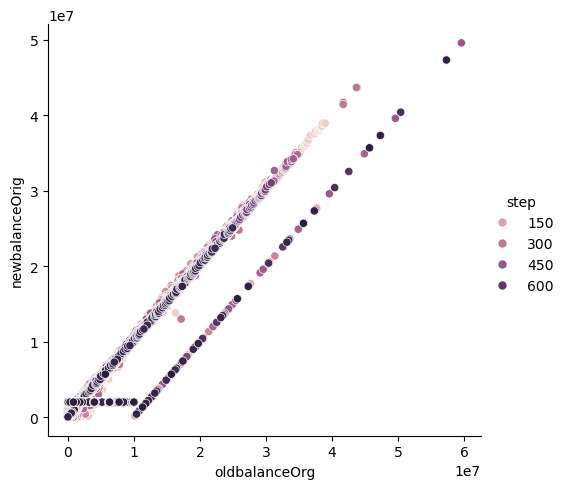

In [106]:
sns.relplot(x='oldbalanceOrg',y='newbalanceOrig',hue='step',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

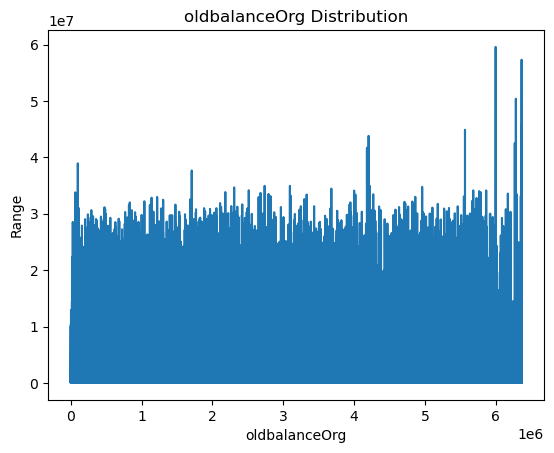

In [247]:
plt.plot(data['oldbalanceOrg'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('Range')
plt.title('oldbalanceOrg Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

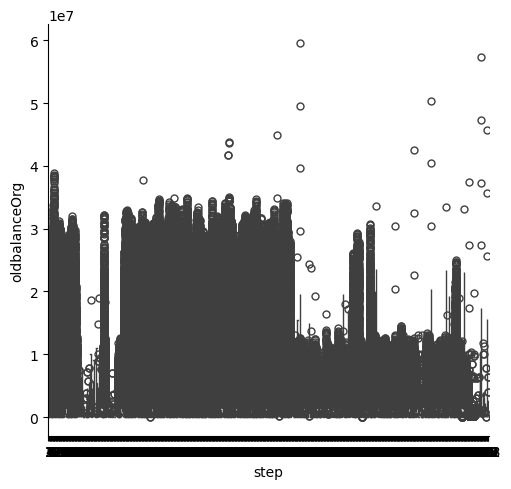

In [108]:
sns.catplot(x='step',y='oldbalanceOrg',kind='box',data=data)
plt.show

## 7 - fitting a model Linear Regression model

2.Describe your fraud detection model in elaboration - In this model i have recruited a Logistic Regression - a simple ML model
to determine if the transaction is fault or not.
This makes use of Binary Logistic Regression - Giving a result in only 2 classes(legitimate or Fault)

## 7a - Importing the necessary libraries

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn import metrics

In [117]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.4,M1979787155,1914407.4,1986698.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.7,M2044282225,1914407.4,1986698.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,1976264.7,C553264065,1914407.4,1986698.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,1976264.7,C38997010,21182.0,1986698.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.9,M1230701703,1914407.4,1986698.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.1,1976264.7,C776919290,1914407.4,339682.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.3,1976264.7,C1881841831,1914407.4,1986698.0,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.3,1976264.7,C1365125890,68488.8,6379898.0,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.5,1976264.7,C2080388513,1914407.4,1986698.0,1,0


## Assigning the value(X,Y)

In [222]:
#here i am taking the x which has the numerical value
#and y which is my target varibale as the isFraud column
x=data[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y=data[['isFraud']]

In [137]:
print(y)

         isFraud
0              0
1              0
2              1
3              1
4              0
...          ...
6362615        1
6362616        1
6362617        1
6362618        1
6362619        1

[6362620 rows x 1 columns]


## Defining the test/train size

In [141]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.8,random_state=1)

In [225]:
#defining the model
model=LogisticRegression()

## Model Fitting

In [145]:
model.fit(x_train,y_train)

C:\Users\srujan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Model Prediction

In [147]:
y_pred=model.predict(x_test)

## Accuracy Measure

4. Demonstrate the performance of the model by using best set of tools - Here are the tools which are imported and implemented to give us an
insight of the performance of the model

In [153]:
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

99.87210457327328

5. What are the key factors that predict fraudulent customer? - Here we ca say that a number of values are affecting the fraudelent transactio
like(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']) which deals with the numerical form of the account/money handled/transaction

In [167]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[5083586       2]
 [   6508       0]]


6. Do these factors make sense? If yes, How? If not, How not? - Yes, they do make sense owing their large size and range they have a direct relationship 
on the legitimacy of the transaction - making them a Direct-Proportional value

In [177]:
#normalizing
confusion_matrix_normal=metrics.confusion_matrix(y_test,y_pred,normalize='all')
print(confusion_matrix_normal)

[[9.98721046e-01 3.92919898e-07]
 [1.27856135e-03 0.00000000e+00]]


<function matplotlib.pyplot.show(close=None, block=None)>

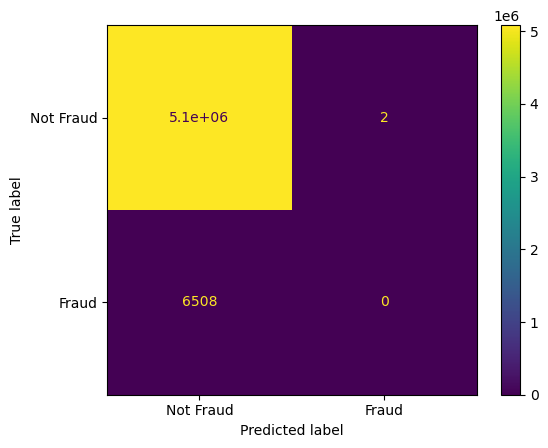

In [183]:
#visualizing the confusion matrix
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Not Fraud','Fraud'])
cm.plot()
plt.show

7. What kind of prevention should be adopted while company update its infrastructure? - This is very vital question, wherin each system/organization have a
review to analyse their performance.
But here the main thing is that the transcation details and the accoun details, balance information must be kept no matter what, which play an important role
in indentifying the Reallness

8. Assuming these actions have been implemented, how would you determine if they work? - So far the model performed the necessary action given the essential details.
Same way until and unless the essential details are preserved this model performs well and otherwise is question to be answered

This fianlly determines that this model is a perfect fit owing to it's accuracy

This is proven by various metrics employed to cross verfiy the predicted value like accuracy_score and confusion_matrix